This notebook will be a short review of key concepts in python. The goal of this notebook is to jog your memory and refresh concepts.  

#### Table of contents
* Jupyter notebook
* Libraries
* Plotting
* Pandas DataFrame manipulation
* Unit testing
* Randomness and reproducibility
* Bonus: list comprehension

## Jupyter notebook
Straight from the [Juptyer website](http://jupyter.org/): "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more."  

To run code in a cell, you can press the run tab, or press control + enter. The 'Kernel' tab is quite useful. If you find your code is stuck running (maybe you wrote an infinite loop), you can go to 'Kernel' -> 'Interrupt' to force quit. 

A few useful keyboard shortcuts:
* Run cell, select below: shift + enter
* Run cell: ctrl + enter
* Run cell, insert below: option + enter

By pressing the 'esc' key, you enter command mode (the colored border around the currently selected cell should change from green to blue). Once in command mode, you can use these shortcuts:
* Insert cell above: a
* Insert cell below: b
* Copy cell: c
* Paste cell: v
* Delete selected cell(s): d d
* Change selected cell to markdown: m
* Change selected cell to code: y

To exit command mode, click anywhere in a cell or press enter.

And of course, don't forget the ever useful:
* Save file: command + s

## Libraries
There are a few libraries that you will use almost always:
* Numpy
* Pandas
* Matplotlib or
* Seaborn

The key points to remember are how to import these libraries and their standard import names, as well as their main uses. 

Numpy (from the [Numpy website](http://www.numpy.org/)):  
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Pandas (from the [Pandas website](https://pandas.pydata.org/)):  
high-performance, easy-to-use data structures and data analysis tools for the Python programming language

Both the Matplotlib and Seaborn libraries are for creating graphs. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting

In [2]:
# Load in the data set
tips_data = sns.load_dataset("tips")

### Plot a histogram of the tips

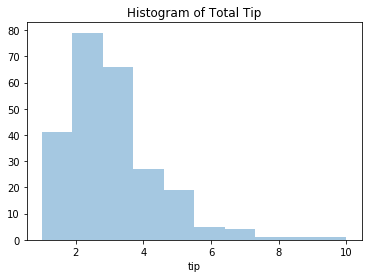

In [3]:
# with seaborn
sns.distplot(tips_data["tip"], kde = False, bins=10).set_title("Histogram of Total Tip")
plt.show()

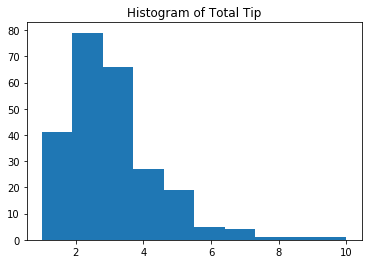

In [4]:
# with matplotlib
plt.hist(tips_data['tip'], bins=10)
plt.title("Histogram of Total Tip")
plt.show()

### Create a boxplot of the total bill amounts

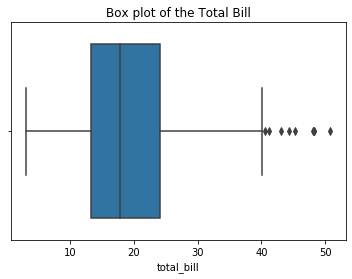

In [5]:
# with seaborn
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

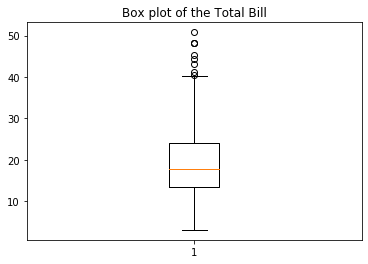

In [6]:
# with matplotlib
plt.boxplot(tips_data["total_bill"])
plt.title("Box plot of the Total Bill")
plt.show()

## Pandas DataFrame manipulation

In [7]:
# Import NHANES 2015-2016 data
df = pd.read_csv("nhanes_2015_2016.csv")

FileNotFoundError: [Errno 2] File nhanes_2015_2016.csv does not exist: 'nhanes_2015_2016.csv'

In [ ]:
# look at top 3 rows
df.head(3)

#### Pick columns by name

In [ ]:
df['SEQN'].head()

#### Pick columns and rows by index name

In [ ]:
df.loc[[0, 1], ['SEQN', 'RIAGENDR']]

#### Pick columns and rows by index location

In [ ]:
df.iloc[[1,2], [0,5]]

## Unit testing
This is the idea that you should run complicated code on a simple test case that you know that outcome of. If your code outputs something you did not expect, then you know there is an error somewhere that must be fixed. When working with large datasets, it is easy to get reasonable output that is actually measuring something different than you wanted. 

### Example
Perhaps you want the mean of the first row.

In [ ]:
df = pd.DataFrame({'col1':[1, 2, 3], 'col2':[3, 4, 5]})
df

In [ ]:
df.mean()[0]

This looks correct, but lets on a DataFrame that doesn't have the same mean for the first row and the first column.

In [ ]:
df = pd.DataFrame({'col1':[1, 2, 3], 'col2':[6, 7, 8]})
df

In [ ]:
df.mean()[0]

Looks like this is actually returning the mean of the first column. Doing a simple test, we found an error that would have been much harder to spot had our DataFrame been 100,000 rows and 300 columns. 

In [ ]:
# Use the argument 'axis=1' to return the means of each row in the dataframe
# Use 'axis=0' (which is the default) to return the means of each column in the dataframe
# The Pandas .mean() method returns a series which can be accessed by a bracketed index value
print(df.mean(axis=1))
print("\n")
print(type(df.mean(axis=1)))
print("\n")
print(df.mean(axis=0))
print("\n")
print(df.mean(axis=1)[2])
print("\n")
print(df.mean(axis=0)[1])

## Randomness and reproducibility

In Python, we refer to randomness as the ability to generate data, strings, or, more generally, numbers at random.

However, when conducting analysis it is important to consider reproducibility. If we are creating random data, how can we enable reproducible analysis?

We do this by utilizing pseudo-random number generators (PRNGs). PRNGs start with a random number, known as the seed, and then use an algorithm to generate a psuedo-random sequence based on it.

This means that we can replicate the output of a random number generator in python simply by knowing which seed was used.

We can showcase this by using the functions in the python library random.

In [ ]:
import random

In [ ]:
random.seed(1234)
random.random()

In [ ]:
random.seed(1234)
random.random()

The random library includes standard distributions that may come in handy

In [ ]:
# Uniform distribution
random.uniform(25,50)

In [ ]:
mu = 0

sigma = 1

random.normalvariate(mu, sigma)

## List comprehension
List comprehensions allow you to easy create lists. They follow the format:
```
my_list = [expression(i) for i in input list]
```
For example, if you wanted to plot the sin curve from -$\pi$ to $\pi$:

In [ ]:
x = np.linspace(-np.pi, np.pi, 100) # create a list of 100 equally spaced points between -pi and pi
x

In [ ]:
# Here's our list comprehension. For each point in x, we want y=sin(x)
y = [np.sin(value) for value in x] 
# let looks at just the first 5 elements of y
y[:5]

In [ ]:
# It doesn't really matter what word you use to represent a value in the input list, 
# the following will built the same y
y = [np.sin(i) for i in x]
y[:5]

In [ ]:
plt.plot(x,y)
plt.show()